In [2]:
!pip install ultralytics opencv-python numpy matplotlib albumentations




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [3]:
!git clone https://github.com/Shenggan/BCCD_Dataset.git

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800 (from 1)
Receiving objects: 100% (800/800), 7.39 MiB | 16.30 MiB/s, done.
Resolving deltas: 100% (378/378), done.


In [5]:
cd BCCD_Dataset

[Errno 2] No such file or directory: 'BCCD_Dataset'
/content/BCCD_Dataset


In [6]:
import os
os.listdir("/content/BCCD_Dataset")

['test.csv',
 'export.py',
 'README.md',
 '.git',
 'plot.py',
 'LICENSE',
 'BCCD',
 '.gitignore',
 'dataset',
 'scripts',
 'example.jpg']

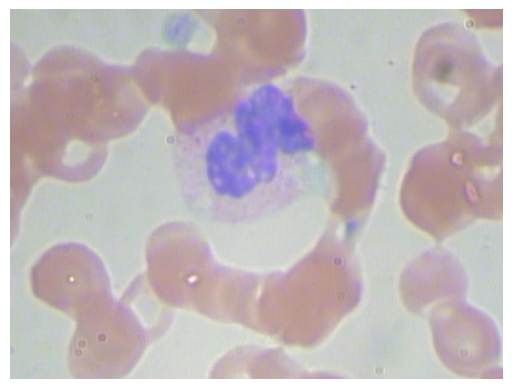

In [7]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content//BCCD_Dataset/BCCD/JPEGImages/BloodImage_00007.jpg"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.show()


In [8]:
pip install albumentations opencv-python


In [9]:
import cv2
import os
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
from glob import glob

In [10]:
# Define augmentation pipeline
transform = A.Compose([
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2)
])

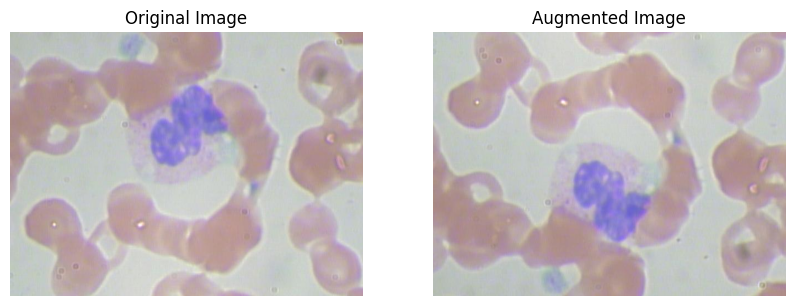

In [11]:
def load_and_augment_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    augmented = transform(image=image)['image']

    return image, augmented

# Pick a sample image
image_path = "/content//BCCD_Dataset/BCCD/JPEGImages/BloodImage_00007.jpg"

# Apply augmentation
original, augmented = load_and_augment_image(image_path)

# Plot original and augmented images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(original)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(augmented)
ax[1].set_title("Augmented Image")
ax[1].axis("off")

plt.show()


In [12]:
save_dir = "BCCD_Dataset/AugmentedImages"
os.makedirs(save_dir, exist_ok=True)

image_paths = glob("/content/BCCD_Dataset/BCCD/JPEGImages/*.jpg")

for img_path in image_paths:
    original, augmented = load_and_augment_image(img_path)

    # Save the augmented image
    filename = os.path.basename(img_path).replace(".jpg", "_aug.jpg")
    cv2.imwrite(os.path.join(save_dir, filename), cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

In [13]:
pip install ultralytics

In [14]:
import os

# Define the dataset structure
dataset_path = "/content/BCCD_Dataset"
sub_dirs = ["images/train", "images/val", "images/test", "labels/train", "labels/val", "labels/test"]

# Create directories if they don’t exist
for sub_dir in sub_dirs:
    os.makedirs(os.path.join(dataset_path, sub_dir), exist_ok=True)

print("Dataset folders created successfully!")


Dataset folders created successfully!


In [15]:
import os
import shutil
import random

# Paths
source_img_dir ="/content//BCCD_Dataset/BCCD/JPEGImages"
train_dir = "/content/BCCD_Dataset/images/train"
val_dir = "/content/BCCD_Dataset/images/val"
test_dir = "/content/BCCD_Dataset/images/test"

# Create directories if they don’t exist
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

# Get all image files
all_images = [img for img in os.listdir(source_img_dir) if img.endswith((".jpg", ".png"))]
random.shuffle(all_images)  # Shuffle for randomness

# Split dataset (80% train, 10% val, 10% test)
train_split = int(0.8 * len(all_images))
val_split = int(0.9 * len(all_images))  # Remaining 10% goes to test

# Move files
for i, img in enumerate(all_images):
    src_path = os.path.join(source_img_dir, img)

    if i < train_split:
        dest_path = os.path.join(train_dir, img)
    elif i < val_split:
        dest_path = os.path.join(val_dir, img)
    else:
        dest_path = os.path.join(test_dir, img)

    shutil.copy(src_path, dest_path)

print(f"✅ Dataset split complete: {train_split} train, {val_split-train_split} val, {len(all_images)-val_split} test images.")


✅ Dataset split complete: 291 train, 36 val, 37 test images.


In [17]:
# Paths for labels
source_label_dir = "BCCD_Dataset/labels"
train_label_dir = "/content/BCCD_Dataset/labels/train"
val_label_dir = "/content/BCCD_Dataset/labels/val"
test_label_dir = "/content/BCCD_Dataset/labels/test"

# Create label directories
for directory in [train_label_dir, val_label_dir, test_label_dir]:
    os.makedirs(directory, exist_ok=True)

# Move labels corresponding to images
for img in os.listdir(train_dir):
    label_file = img.replace(".jpg", ".txt").replace(".png", ".txt")  # Convert image name to label file name
    src_path = os.path.join(source_label_dir, label_file)
    dest_path = os.path.join(train_label_dir, label_file)
    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)

for img in os.listdir(val_dir):
    label_file = img.replace(".jpg", ".txt").replace(".png", ".txt")
    src_path = os.path.join(source_label_dir, label_file)
    dest_path = os.path.join(val_label_dir, label_file)
    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)

for img in os.listdir(test_dir):
    label_file = img.replace(".jpg", ".txt").replace(".png", ".txt")
    src_path = os.path.join(source_label_dir, label_file)
    dest_path = os.path.join(test_label_dir, label_file)
    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)

print("✅ Label files moved successfully!")


✅ Label files moved successfully!


In [18]:
import yaml

# Define dataset configuration
data_config = {
    "train": os.path.abspath("/content/BCCD_Dataset/images/train"),
    "val": os.path.abspath("/content//BCCD_Dataset/images/val"),
    "test": os.path.abspath("/content//BCCD_Dataset/images/test"),
    "nc": 3,  # Number of classes
    "names": ["RBC", "WBC", "Platelets"]  # Class names
}

# Save to YAML file
yaml_path = os.path.join(dataset_path, "data1.yaml")
with open(yaml_path, "w") as yaml_file:
    yaml.dump(data_config, yaml_file, default_flow_style=False)

print(f"data.yaml created successfully at {yaml_path}")


data.yaml created successfully at /content/BCCD_Dataset/data1.yaml


In [19]:
import torch  # Import PyTorch
from ultralytics import YOLO

# Initialize YOLOv10 model
model = YOLO("yolov10n.pt")  # Use the smallest YOLOv10 model

# Train the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model.train(data="data1.yaml", epochs=50, imgsz=640, batch=8, device=device)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.59M/5.59M [00:00<00:00, 101MB/s]


Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=data1.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 90.6MB/s]


AMP: checks passed ✅


train: Scanning /content/BCCD_Dataset/labels/train... 0 images, 291 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<00:00, 4384.92it/s]

train: WARNING ⚠️ No labels found in /content/BCCD_Dataset/labels/train.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
train: New cache created: /content/BCCD_Dataset/labels/train.cache
WARNING ⚠️ No labels found in /content/BCCD_Dataset/labels/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/BCCD_Dataset/labels/val... 0 images, 36 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 3685.41it/s]


val: WARNING ⚠️ No labels found in /content/BCCD_Dataset/labels/val.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: New cache created: /content/BCCD_Dataset/labels/val.cache
WARNING ⚠️ No labels found in /content/BCCD_Dataset/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
Plotting labels to runs/detect/train/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   bo

       1/50      1.45G          0      110.2          0          0        640: 100%|██████████| 37/37 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.58G          0      96.49          0          0        640: 100%|██████████| 37/37 [00:07<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.57it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.59G          0      86.21          0          0        640: 100%|██████████| 37/37 [00:06<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.01it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.61G          0      78.73          0          0        640: 100%|██████████| 37/37 [00:07<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.64it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.63G          0      72.98          0          0        640: 100%|██████████| 37/37 [00:05<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.76it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.64G          0      65.56          0          0        640: 100%|██████████| 37/37 [00:07<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.93it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.66G          0      58.86          0          0        640: 100%|██████████| 37/37 [00:05<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 14.49it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.67G          0       52.9          0          0        640: 100%|██████████| 37/37 [00:06<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.82it/s]

                   all         36          0          0          0          0          0



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.69G          0      47.28          0          0        640: 100%|██████████| 37/37 [00:06<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.45it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.71G          0      42.23          0          0        640: 100%|██████████| 37/37 [00:06<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.62it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.71G          0       37.7          0          0        640: 100%|██████████| 37/37 [00:07<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.64it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.74G          0       33.6          0          0        640: 100%|██████████| 37/37 [00:06<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.94it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.75G          0         30          0          0        640: 100%|██████████| 37/37 [00:07<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.83it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.77G          0      26.76          0          0        640: 100%|██████████| 37/37 [00:05<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.56it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.78G          0      23.72          0          0        640: 100%|██████████| 37/37 [00:07<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.47it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       1.8G          0      21.12          0          0        640: 100%|██████████| 37/37 [00:06<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.45it/s]

                   all         36          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:654: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.81G          0      18.74          0          0        640: 100%|██████████| 37/37 [00:06<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.26it/s]


RuntimeError: torch.cat(): expected a non-empty list of Tensors

In [21]:
import os

dataset_path = "/content/BCCD_Dataset"

# Check train images
train_images = os.listdir(os.path.join(dataset_path, "images/train"))
train_labels = os.listdir(os.path.join(dataset_path, "labels/train"))

print(f"Train Images: {len(train_images)}, Train Labels: {len(train_labels)}")

# Check val images
val_images = os.listdir(os.path.join(dataset_path, "images/val"))
val_labels = os.listdir(os.path.join(dataset_path, "labels/val"))

print(f"Val Images: {len(val_images)}, Val Labels: {len(val_labels)}")

# Check test images
test_images = os.listdir(os.path.join(dataset_path, "images/test"))
test_labels = os.listdir(os.path.join(dataset_path, "labels/test"))

print(f"Test Images: {len(test_images)}, Test Labels: {len(test_labels)}")


Train Images: 291, Train Labels: 0
Val Images: 36, Val Labels: 0
Test Images: 37, Test Labels: 0


In [16]:
import os

source_label_dir = "/content/BCCD_Dataset/BCCD/Annotations"

label_files = [f for f in os.listdir(source_label_dir) if f.endswith(".xml")]

print(f"Total Label Files in Annotations: {len(label_files)}")
print("Sample Labels:", label_files[:5])


Total Label Files in Annotations: 364
Sample Labels: ['BloodImage_00353.xml', 'BloodImage_00179.xml', 'BloodImage_00366.xml', 'BloodImage_00062.xml', 'BloodImage_00037.xml']


In [17]:
pip install lxml


In [18]:
import os
import xml.etree.ElementTree as ET

# Define paths
source_label_dir = "/content/BCCD_Dataset/BCCD/Annotations"
output_label_dir = "/content/BCCD_Dataset/labels"
os.makedirs(output_label_dir, exist_ok=True)

# Class mapping
class_names = {"RBC": 0, "WBC": 1, "Platelets": 2}

# Convert each XML annotation file
for xml_file in os.listdir(source_label_dir):
    if not xml_file.endswith(".xml"):
        continue

    # Parse XML
    tree = ET.parse(os.path.join(source_label_dir, xml_file))
    root = tree.getroot()

    # Get image dimensions
    size = root.find("size")
    img_width = int(size.find("width").text)
    img_height = int(size.find("height").text)

    # Create corresponding .txt file
    txt_filename = xml_file.replace(".xml", ".txt")
    txt_path = os.path.join(output_label_dir, txt_filename)

    with open(txt_path, "w") as txt_file:
        for obj in root.findall("object"):
            class_name = obj.find("name").text
            if class_name not in class_names:
                continue  # Skip unknown classes

            class_id = class_names[class_name]
            bbox = obj.find("bndbox")
            x_min = int(bbox.find("xmin").text)
            y_min = int(bbox.find("ymin").text)
            x_max = int(bbox.find("xmax").text)
            y_max = int(bbox.find("ymax").text)

            # Convert to YOLO format
            x_center = (x_min + x_max) / (2 * img_width)
            y_center = (y_min + y_max) / (2 * img_height)
            width = (x_max - x_min) / img_width
            height = (y_max - y_min) / img_height

            # Write to file
            txt_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

print("✅ All XML annotations converted to YOLO format!")


✅ All XML annotations converted to YOLO format!


In [19]:
import shutil

train_label_dir = "/content/BCCD_Dataset/labels/train"
val_label_dir = "/content/BCCD_Dataset/labels/val"
test_label_dir = "/content/BCCD_Dataset/labels/test"

# Create label directories
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)

# Move labels corresponding to images
for img in os.listdir("/content/BCCD_Dataset/images/train"):
    label_file = img.replace(".jpg", ".txt").replace(".png", ".txt")
    src_path = os.path.join("/content/BCCD_Dataset/labels", label_file)
    dest_path = os.path.join(train_label_dir, label_file)
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)

for img in os.listdir("/content/BCCD_Dataset/images/val"):
    label_file = img.replace(".jpg", ".txt").replace(".png", ".txt")
    src_path = os.path.join("/content/BCCD_Dataset/labels", label_file)
    dest_path = os.path.join(val_label_dir, label_file)
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)

for img in os.listdir("/content/BCCD_Dataset/images/test"):
    label_file = img.replace(".jpg", ".txt").replace(".png", ".txt")
    src_path = os.path.join("/content/BCCD_Dataset/labels", label_file)
    dest_path = os.path.join(test_label_dir, label_file)
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)

print("✅ Label files moved successfully!")


✅ Label files moved successfully!


In [21]:
import yaml

# Define dataset configuration
data_config = {
    "train": os.path.abspath("/content/BCCD_Dataset/images/train"),
    "val": os.path.abspath("/content//BCCD_Dataset/images/val"),
    "test": os.path.abspath("/content//BCCD_Dataset/images/test"),
    "nc": 3,  # Number of classes
    "names": ["RBC", "WBC", "Platelets"]  # Class names
}

# Save to YAML file
yaml_path = os.path.join(dataset_path, "data1.yaml")
with open(yaml_path, "w") as yaml_file:
    yaml.dump(data_config, yaml_file, default_flow_style=False)

print(f"data.yaml created successfully at {yaml_path}")


data.yaml created successfully at /content/BCCD_Dataset/data1.yaml


In [22]:
train_labels = os.listdir("/content/BCCD_Dataset/labels/train")
val_labels = os.listdir("/content/BCCD_Dataset/labels/val")
test_labels = os.listdir("/content/BCCD_Dataset/labels/test")

print(f"Train Labels: {len(train_labels)}")
print(f"Validation Labels: {len(val_labels)}")
print(f"Test Labels: {len(test_labels)}")


Train Labels: 291
Validation Labels: 36
Test Labels: 37


In [23]:
from ultralytics import YOLO
import torch

# Check for GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load YOLOv10 model
model = YOLO("yolov10n.pt")  # 'n' = nano model (smallest, fastest)

# Train model on BCCD dataset
model.train(
    data="/content/BCCD_Dataset/data1.yaml",  # Ensure this file has correct paths
    epochs=50,       # Number of training epochs
    imgsz=640,       # Image size
    batch=8,         # Batch size (adjust based on your system)
    device=device    # Use GPU if available
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Using device: cuda


100%|██████████| 5.59M/5.59M [00:00<00:00, 334MB/s]

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/BCCD_Dataset/data1.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 95.0MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 317MB/s]


AMP: checks passed ✅


train: Scanning /content/BCCD_Dataset/labels/train... 291 images, 0 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<00:00, 2231.29it/s]

train: New cache created: /content/BCCD_Dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/BCCD_Dataset/labels/val... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 1493.11it/s]

val: New cache created: /content/BCCD_Dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.65G      2.589      6.178      2.652         60        640: 100%|██████████| 37/37 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         36        537     0.0233      0.624      0.306      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.65G      2.489      4.512      2.424        268        640:  14%|█▎        | 5/37 [00:01<00:11,  2.80it/s]


KeyboardInterrupt: 

In [34]:
import shutil

# Define paths
source_path = "/content/best.pt"  # YOLOv10 trained model
destination_path = "yolov10_bccd.pt"  # Save in the current directory

# Copy the model
shutil.copy(source_path, destination_path)
print(f"✅ Model saved as {destination_path}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/best.pt'

In [36]:
from google.colab import drive
drive.mount('/content/drive')

# Copy model to Google Drive
shutil.copy("runs/detect/train/weights/best.pt", "/content/drive/MyDrive/yolov10_bccd.pt")
print("✅ Model saved to Google Drive!")


Mounted at /content/drive
✅ Model saved to Google Drive!


In [37]:
import shutil

# Define paths
source_path = "runs/detect/train/weights/best.pt"  # YOLOv10 trained model
destination_path = "yolov10_bccd.pt"  # Save in the current directory

# Copy the model
shutil.copy(source_path, destination_path)
print(f"✅ Model saved as {destination_path}")


✅ Model saved as yolov10_bccd.pt


In [38]:
from ultralytics import YOLO

# Load the trained model (best weights)
model = YOLO("runs/detect/train/weights/best.pt")



image 1/1 /content/BCCD_Dataset/images/test/BloodImage_00314.jpg: 480x640 (no detections), 20.2ms
Speed: 3.0ms preprocess, 20.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


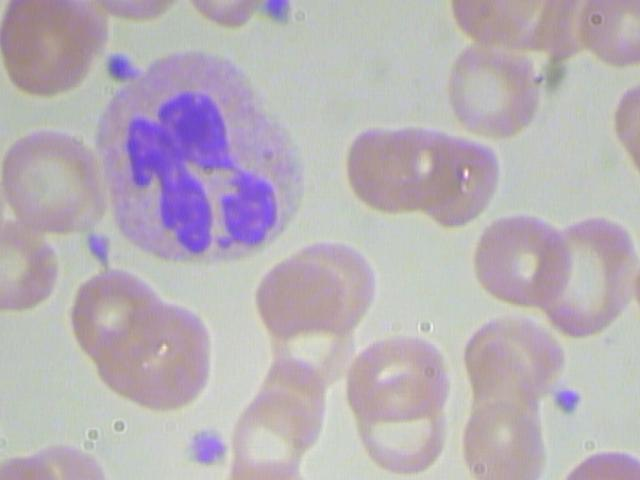

In [43]:
results = model("/content/BCCD_Dataset/images/test/BloodImage_00314.jpg", conf=0.25)  # Default is 0.6
results[0].show()


In [44]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/BCCD_Dataset/labels/val.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


                   all         36        530          0          0          0          0
                   RBC         36        456          0          0          0          0
                   WBC         35         36          0          0          0          0
             Platelets         23         38          0          0          0          0
Speed: 8.0ms preprocess, 19.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c185e3b6f10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov10n.pt")
model.train(
    data="/content/BCCD_Dataset/data1.yaml",
    epochs=100,      # Increase training time
    imgsz=640,
    batch=8,
    device="cuda"
)


Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/BCCD_Dataset/data1.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning /content/BCCD_Dataset/labels/train.cache... 291 images, 0 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/BCCD_Dataset/labels/val.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.63G      2.571      6.212      2.655         44        640: 100%|██████████| 37/37 [00:09<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]

                   all         36        530     0.0227      0.622      0.326      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.63G      2.529      3.829      2.427         66        640: 100%|██████████| 37/37 [00:06<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.17it/s]


                   all         36        530      0.782      0.338      0.431      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.63G      2.499      3.127      2.436         47        640: 100%|██████████| 37/37 [00:08<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.43it/s]


                   all         36        530      0.771      0.476      0.691       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.63G      2.445       2.92       2.45         58        640: 100%|██████████| 37/37 [00:07<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         36        530      0.583      0.679      0.697      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.63G      2.342      2.632      2.383         46        640: 100%|██████████| 37/37 [00:07<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.33it/s]


                   all         36        530      0.616       0.72      0.755      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.63G      2.353      2.472      2.352        114        640: 100%|██████████| 37/37 [00:08<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]

                   all         36        530      0.744      0.687      0.778      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.63G      2.342      2.488       2.36         35        640: 100%|██████████| 37/37 [00:06<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]

                   all         36        530      0.665      0.718      0.779      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.65G      2.285      2.339      2.349         65        640: 100%|██████████| 37/37 [00:08<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.59it/s]

                   all         36        530      0.682      0.804      0.827      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.66G      2.262      2.235      2.315         34        640: 100%|██████████| 37/37 [00:06<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]

                   all         36        530      0.757      0.819      0.831      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.68G      2.236      2.182      2.271         38        640: 100%|██████████| 37/37 [00:07<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.59it/s]

                   all         36        530      0.758      0.824      0.833      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.68G      2.374      2.182      2.328        187        640:   3%|▎         | 1/37 [00:00<00:06,  5.51it/s]

In [1]:
import os

label_dir = "BCCD_Dataset/labels/train"
sample_label = os.listdir(label_dir)[0]  # Pick a random label file

with open(os.path.join(label_dir, sample_label), "r") as f:
    content = f.readlines()

print(f"Sample Label File: {sample_label}")
print("Label Content:", content)


FileNotFoundError: [Errno 2] No such file or directory: 'BCCD_Dataset/labels/train'

In [25]:
import os

label_dir = "/content/BCCD_Dataset/labels/train"
sample_label = os.listdir(label_dir)[0]  # Pick a random label file

with open(os.path.join(label_dir, sample_label), "r") as f:
    content = f.readlines()

print(f"Sample Label File: {sample_label}")
print("Label Content:", content)


Sample Label File: BloodImage_00245.txt
Label Content: ['0 0.600000 0.858333 0.162500 0.195833\n', '0 0.434375 0.914583 0.153125 0.170833\n', '0 0.875781 0.357292 0.160938 0.222917\n', '0 0.717969 0.130208 0.160938 0.222917\n', '0 0.546094 0.292708 0.179688 0.222917\n', '0 0.583594 0.475000 0.142187 0.225000\n', '0 0.492969 0.643750 0.142187 0.225000\n', '0 0.555469 0.686458 0.107813 0.160417\n', '0 0.049219 0.168750 0.095312 0.216667\n', '0 0.136719 0.328125 0.179688 0.222917\n', '0 0.409375 0.223958 0.153125 0.218750\n', '0 0.506250 0.081250 0.156250 0.158333\n', '0 0.260937 0.207292 0.184375 0.202083\n', '0 0.836719 0.871875 0.160938 0.222917\n', '0 0.058594 0.891667 0.114062 0.191667\n', '1 0.279687 0.532292 0.318750 0.422917\n', '2 0.040625 0.703125 0.053125 0.060417\n']


In [26]:
import os

print("Train Images:", len(os.listdir("/content/BCCD_Dataset/images/train")))
print("Validation Images:", len(os.listdir("/content/BCCD_Dataset/images/val")))


Train Images: 291
Validation Images: 36


In [27]:
from ultralytics import YOLO

# Use a stronger model (YOLOv10s)
model = YOLO("yolov10s.pt")

# Train with more epochs for better accuracy
model.train(
    data="/content/BCCD_Dataset/data1.yaml",
    epochs=100,  # Train for longer
    imgsz=640,
    batch=8,
    device="cuda"
)


100%|██████████| 15.9M/15.9M [00:00<00:00, 59.1MB/s]

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/BCCD_Dataset/data1.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

 16                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 17                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 20                  -1  1     68864  ultralytics.nn.modules.block.SCDown          [256, 256, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 22                  -1  1   1089536  ultralytics.nn.modules.block.C2fCIB          [768, 512, 1, True, True]     
 23        [16, 19, 22]  1   1641122  ultralytics.nn.modules.head.v10Detect        [3, [128, 256, 512]]          
YOLOv10s summary: 234 layers, 8,068,674 parameters, 8,068,658 gradients, 24.8 GFLOPs

Tr

train: Scanning /content/BCCD_Dataset/labels/train.cache... 291 images, 0 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/BCCD_Dataset/labels/val.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.79G       2.74      4.547      2.967         60        640: 100%|██████████| 37/37 [00:09<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]

                   all         36        537      0.586      0.727      0.647      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.12G      2.384      2.432      2.528         77        640: 100%|██████████| 37/37 [00:08<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]

                   all         36        537      0.698      0.715      0.719       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.15G      2.473      2.393      2.558         38        640: 100%|██████████| 37/37 [00:08<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]

                   all         36        537      0.473      0.771      0.687      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.21G      2.474      2.246       2.55         48        640: 100%|██████████| 37/37 [00:08<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]

                   all         36        537      0.663      0.807      0.777      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.24G       2.46      1.998      2.523         44        640: 100%|██████████| 37/37 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]

                   all         36        537      0.783      0.792      0.877      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.25G      2.401      1.874      2.472        102        640: 100%|██████████| 37/37 [00:08<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]

                   all         36        537      0.778      0.833      0.875      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.29G      2.399      1.864      2.464         35        640: 100%|██████████| 37/37 [00:08<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]

                   all         36        537      0.739      0.703      0.806      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.34G      2.387      1.871      2.481         65        640: 100%|██████████| 37/37 [00:08<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.81it/s]

                   all         36        537      0.636      0.581      0.658      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.34G      2.342      1.756      2.459         51        640: 100%|██████████| 37/37 [00:07<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]

                   all         36        537       0.82      0.788       0.89      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.39G      2.354      1.781      2.429         42        640: 100%|██████████| 37/37 [00:08<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]

                   all         36        537      0.758      0.857      0.885      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.43G      2.371      1.801      2.444         54        640: 100%|██████████| 37/37 [00:08<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]

                   all         36        537       0.78      0.825      0.881      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.43G       2.34      1.704      2.395         87        640: 100%|██████████| 37/37 [00:07<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]

                   all         36        537      0.814      0.922      0.915      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.43G      2.307      1.748      2.396        100        640: 100%|██████████| 37/37 [00:08<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]

                   all         36        537      0.843      0.794      0.899       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.43G      2.282      1.705      2.416         94        640: 100%|██████████| 37/37 [00:08<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]

                   all         36        537      0.804      0.892      0.903      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.43G      2.225      1.671      2.345         54        640: 100%|██████████| 37/37 [00:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]

                   all         36        537      0.792      0.918      0.892      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.43G      2.204      1.609      2.334        114        640: 100%|██████████| 37/37 [00:07<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.80it/s]

                   all         36        537      0.853      0.799      0.896      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.43G      2.208      1.593      2.352         71        640: 100%|██████████| 37/37 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]

                   all         36        537      0.766      0.905      0.903      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.43G       2.21      1.536      2.364        102        640: 100%|██████████| 37/37 [00:08<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]

                   all         36        537      0.852      0.871      0.903      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.43G        2.2      1.606       2.37         78        640: 100%|██████████| 37/37 [00:08<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.59it/s]

                   all         36        537      0.774       0.93      0.885      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.43G      2.317       1.68      2.442         93        640: 100%|██████████| 37/37 [00:07<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.81it/s]

                   all         36        537      0.789       0.86      0.879      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.43G      2.193      1.531      2.348         62        640: 100%|██████████| 37/37 [00:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]

                   all         36        537      0.843      0.805      0.885      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.43G      2.189      1.493      2.364         56        640: 100%|██████████| 37/37 [00:08<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]

                   all         36        537      0.805      0.791      0.882      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.43G       2.25      1.587      2.372         23        640: 100%|██████████| 37/37 [00:08<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.91it/s]

                   all         36        537      0.885      0.815      0.913      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.43G       2.18      1.505      2.318         81        640: 100%|██████████| 37/37 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]

                   all         36        537      0.875      0.784      0.882      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.43G      2.165      1.513       2.32         67        640: 100%|██████████| 37/37 [00:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.87it/s]

                   all         36        537      0.824      0.888      0.899      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.43G      2.191      1.556      2.345        110        640: 100%|██████████| 37/37 [00:08<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.69it/s]

                   all         36        537      0.789      0.932       0.91       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.43G      2.197      1.569      2.356         35        640: 100%|██████████| 37/37 [00:08<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]

                   all         36        537      0.797      0.874       0.92      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.43G      2.158      1.483       2.35         58        640: 100%|██████████| 37/37 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]

                   all         36        537      0.812      0.902      0.912      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.43G       2.16       1.52      2.342         73        640: 100%|██████████| 37/37 [00:08<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.30it/s]

                   all         36        537      0.841      0.854      0.899      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.43G      2.072      1.434      2.263         96        640: 100%|██████████| 37/37 [00:08<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.18it/s]

                   all         36        537      0.767      0.825      0.902      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.43G      2.076      1.407       2.26         83        640: 100%|██████████| 37/37 [00:07<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         36        537       0.84      0.855      0.905      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.43G      2.035      1.369      2.254         64        640: 100%|██████████| 37/37 [00:08<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]

                   all         36        537       0.83      0.838      0.878      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.43G      2.058      1.374       2.27         58        640: 100%|██████████| 37/37 [00:08<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]

                   all         36        537      0.819      0.926      0.913      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.43G       2.13        1.4      2.309         64        640: 100%|██████████| 37/37 [00:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]

                   all         36        537      0.824      0.843      0.881        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.43G      2.098      1.381      2.274         61        640: 100%|██████████| 37/37 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]

                   all         36        537      0.785      0.921      0.914      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.43G      2.082      1.386      2.268         91        640: 100%|██████████| 37/37 [00:08<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]

                   all         36        537      0.866      0.878      0.915      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.46G      2.065      1.353      2.279         65        640: 100%|██████████| 37/37 [00:08<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]

                   all         36        537       0.81      0.864      0.904      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.46G      2.063      1.362      2.235         89        640: 100%|██████████| 37/37 [00:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]

                   all         36        537      0.823      0.849       0.89      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.46G      2.073      1.375      2.277        122        640: 100%|██████████| 37/37 [00:07<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]

                   all         36        537      0.744      0.794      0.828       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.46G      2.026      1.338      2.256         93        640: 100%|██████████| 37/37 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]

                   all         36        537        0.8      0.905      0.918        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.46G      2.035      1.338      2.256         74        640: 100%|██████████| 37/37 [00:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.42it/s]

                   all         36        537      0.805      0.896      0.917      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.46G      2.013      1.327      2.239         37        640: 100%|██████████| 37/37 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         36        537       0.87      0.839      0.912       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.46G      1.992      1.308      2.228         73        640: 100%|██████████| 37/37 [00:07<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]

                   all         36        537      0.806      0.885        0.9      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.46G      1.994      1.292      2.231         74        640: 100%|██████████| 37/37 [00:08<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]

                   all         36        537      0.845      0.842      0.903      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.46G      2.003      1.289       2.23         51        640: 100%|██████████| 37/37 [00:08<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.17it/s]

                   all         36        537      0.828       0.86      0.913      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.46G      1.981      1.256      2.222         60        640: 100%|██████████| 37/37 [00:07<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]

                   all         36        537      0.836      0.885       0.91      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.46G      2.004      1.297      2.257         43        640: 100%|██████████| 37/37 [00:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]

                   all         36        537      0.862      0.816      0.918      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.46G      1.999      1.286      2.248         92        640: 100%|██████████| 37/37 [00:08<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]

                   all         36        537      0.864      0.827        0.9      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.46G      2.012      1.312       2.24         72        640: 100%|██████████| 37/37 [00:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         36        537      0.825      0.869      0.906      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.46G      1.977      1.288      2.238         31        640: 100%|██████████| 37/37 [00:08<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.09it/s]

                   all         36        537      0.818      0.943      0.924      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.46G      1.983      1.274      2.235         82        640: 100%|██████████| 37/37 [00:08<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]

                   all         36        537      0.856       0.89      0.936      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.46G      1.972      1.237        2.2         69        640: 100%|██████████| 37/37 [00:08<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]

                   all         36        537      0.828      0.864      0.913      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.46G      1.925      1.202      2.169         55        640: 100%|██████████| 37/37 [00:07<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.58it/s]

                   all         36        537      0.861       0.83      0.914       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.46G      1.912      1.186      2.168         76        640: 100%|██████████| 37/37 [00:08<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]

                   all         36        537      0.827      0.903      0.917      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.46G      1.954      1.217      2.193         80        640: 100%|██████████| 37/37 [00:08<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.89it/s]

                   all         36        537      0.833      0.858      0.914      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.46G      1.961      1.199        2.2         66        640: 100%|██████████| 37/37 [00:08<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]

                   all         36        537       0.81      0.919      0.924      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.46G      1.936      1.233      2.189         35        640: 100%|██████████| 37/37 [00:07<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]

                   all         36        537      0.815      0.895      0.922      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.46G      1.881      1.177      2.166         56        640: 100%|██████████| 37/37 [00:08<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.28it/s]

                   all         36        537      0.799      0.864      0.914      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.46G      1.907      1.156      2.179         72        640: 100%|██████████| 37/37 [00:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]

                   all         36        537       0.84       0.89      0.925      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.46G      1.855      1.104       2.16        105        640: 100%|██████████| 37/37 [00:08<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]

                   all         36        537       0.85      0.883      0.921      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.46G      1.848       1.15       2.13         78        640: 100%|██████████| 37/37 [00:07<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]

                   all         36        537      0.855      0.831      0.912       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.46G      1.886      1.146      2.154         80        640: 100%|██████████| 37/37 [00:08<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]

                   all         36        537      0.827      0.876      0.899      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.46G      1.819      1.117      2.135         60        640: 100%|██████████| 37/37 [00:08<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.49it/s]

                   all         36        537      0.829      0.873      0.893      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.46G      1.853      1.102      2.177         62        640: 100%|██████████| 37/37 [00:08<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.55it/s]

                   all         36        537      0.848      0.854      0.907      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.46G      1.835      1.118      2.143         42        640: 100%|██████████| 37/37 [00:08<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.83it/s]

                   all         36        537      0.822      0.839      0.901      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.46G      1.819      1.093      2.138        113        640: 100%|██████████| 37/37 [00:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]

                   all         36        537      0.851      0.861      0.912      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.46G      1.818      1.086      2.137         99        640: 100%|██████████| 37/37 [00:08<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.92it/s]

                   all         36        537      0.866      0.866      0.911      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.46G      1.797      1.053      2.134        105        640: 100%|██████████| 37/37 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         36        537      0.846      0.893       0.91      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.46G      1.807      1.084      2.122         51        640: 100%|██████████| 37/37 [00:07<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]

                   all         36        537      0.829       0.87      0.911      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.46G      1.792      1.062      2.126         59        640: 100%|██████████| 37/37 [00:08<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]

                   all         36        537       0.82      0.867      0.913      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.46G      1.801      1.064      2.135         59        640: 100%|██████████| 37/37 [00:08<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]

                   all         36        537      0.877      0.812      0.895      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.46G      1.783      1.045      2.129         65        640: 100%|██████████| 37/37 [00:08<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]

                   all         36        537      0.833      0.853        0.9      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.46G      1.836      1.098      2.143         95        640: 100%|██████████| 37/37 [00:07<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]

                   all         36        537      0.842      0.893      0.911      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.46G       1.75      1.025      2.109         45        640: 100%|██████████| 37/37 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]

                   all         36        537       0.84      0.862      0.924      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.46G      1.772       1.01      2.127         93        640: 100%|██████████| 37/37 [00:09<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]

                   all         36        537       0.83      0.843      0.898      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.46G      1.746      1.012      2.121         70        640: 100%|██████████| 37/37 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         36        537      0.863      0.829      0.909      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.46G      1.726     0.9828      2.092         49        640: 100%|██████████| 37/37 [00:07<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]

                   all         36        537      0.832      0.878      0.913      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.46G      1.747     0.9836       2.09         66        640: 100%|██████████| 37/37 [00:08<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]

                   all         36        537      0.883       0.83      0.909      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.46G      1.694     0.9562      2.068         76        640: 100%|██████████| 37/37 [00:08<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.79it/s]

                   all         36        537      0.818      0.882      0.902       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.46G      1.703     0.9598      2.077         71        640: 100%|██████████| 37/37 [00:08<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]

                   all         36        537      0.851      0.865      0.903      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.46G      1.691     0.9312      2.062         71        640: 100%|██████████| 37/37 [00:08<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]

                   all         36        537      0.832      0.867      0.904      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.46G      1.676     0.9382      2.073         94        640: 100%|██████████| 37/37 [00:08<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]

                   all         36        537      0.832      0.891      0.906      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.46G      1.653     0.9343      2.068         86        640: 100%|██████████| 37/37 [00:08<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]

                   all         36        537      0.863      0.853      0.911      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.46G      1.639     0.9097      2.046         62        640: 100%|██████████| 37/37 [00:07<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.12it/s]

                   all         36        537      0.819      0.895      0.915       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.46G      1.674     0.9429      2.081         41        640: 100%|██████████| 37/37 [00:08<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.32it/s]

                   all         36        537      0.858      0.884      0.917      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.46G      1.638     0.9154      2.045         39        640: 100%|██████████| 37/37 [00:08<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]

                   all         36        537      0.867      0.882      0.924      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.46G      1.649     0.9264      2.049         83        640: 100%|██████████| 37/37 [00:08<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]

                   all         36        537      0.837      0.895      0.916      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.46G       1.65     0.9326      2.076         30        640: 100%|██████████| 37/37 [00:07<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.21it/s]

                   all         36        537      0.817      0.868      0.916       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.46G      1.631     0.8893      2.073         52        640: 100%|██████████| 37/37 [00:08<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]

                   all         36        537      0.859      0.851      0.905      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.46G      1.592     0.8834       2.03         57        640: 100%|██████████| 37/37 [00:09<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.03it/s]

                   all         36        537      0.868      0.863      0.917      0.625


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.46G      1.544     0.8104      2.049         41        640: 100%|██████████| 37/37 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.90it/s]

                   all         36        537      0.849      0.848       0.91      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.46G      1.527     0.7914       2.04         31        640: 100%|██████████| 37/37 [00:07<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.34it/s]

                   all         36        537       0.85      0.918       0.92      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.46G      1.506     0.7722      2.039         30        640: 100%|██████████| 37/37 [00:08<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]

                   all         36        537      0.851      0.891      0.929       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.46G      1.473     0.7372      1.999         52        640: 100%|██████████| 37/37 [00:08<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]

                   all         36        537      0.846      0.872      0.917      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.46G      1.464     0.7337      1.998         35        640: 100%|██████████| 37/37 [00:08<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.86it/s]

                   all         36        537       0.83       0.87      0.914      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.46G      1.441     0.7066      1.992         49        640: 100%|██████████| 37/37 [00:07<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]

                   all         36        537      0.847       0.86      0.918      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.46G      1.463     0.7129      2.016         38        640: 100%|██████████| 37/37 [00:08<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]

                   all         36        537      0.815      0.887       0.92      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.46G       1.45     0.6801      1.989         37        640: 100%|██████████| 37/37 [00:08<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.07it/s]

                   all         36        537      0.846      0.884      0.915       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.46G      1.422      0.681      1.988         27        640: 100%|██████████| 37/37 [00:07<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]

                   all         36        537      0.829      0.895      0.916      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.46G      1.414     0.6739      1.958         40        640: 100%|██████████| 37/37 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.16it/s]

                   all         36        537      0.831      0.903      0.917      0.626



100 epochs completed in 0.274 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 16.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 129 layers, 8,037,282 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]


                   all         36        537      0.856      0.885      0.917      0.638
                   RBC         35        465       0.84      0.742      0.866      0.614
                   WBC         36         38      0.939          1      0.993      0.802
             Platelets         18         34       0.79      0.912      0.893        0.5
Speed: 0.5ms preprocess, 7.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d1b619b4890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04


image 1/1 /content/BCCD_Dataset/images/test/BloodImage_00019.jpg: 480x640 14 RBCs, 1 WBC, 2 Plateletss, 48.4ms
Speed: 1.9ms preprocess, 48.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


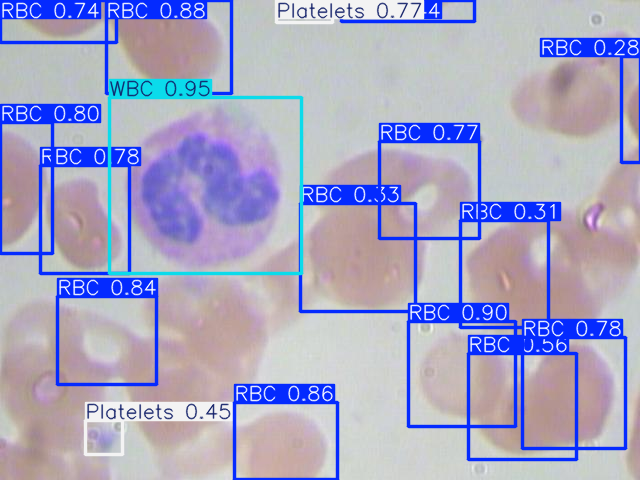

In [28]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/detect/train2/weights/best.pt")  # Make sure you're using the latest trained weights

# Test on a new test image
results = model("/content/BCCD_Dataset/images/test/BloodImage_00019.jpg", conf=0.25)
results[0].show()  # Show detection results


In [29]:
import shutil

# Define paths
source_path = "runs/detect/train2/weights/best.pt"
destination_path = "yolov10_bccd_final.pt"

# Copy model to a new file
shutil.copy(source_path, destination_path)
print(f"✅ Model saved as {destination_path}")


✅ Model saved as yolov10_bccd_final.pt


In [30]:
from google.colab import drive
drive.mount('/content/drive')

shutil.copy("runs/detect/train2/weights/best.pt", "/content/drive/MyDrive/yolov10_bccd_final.pt")
print("✅ Model saved to Google Drive!")


Mounted at /content/drive
✅ Model saved to Google Drive!
